In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cmcrameri import cm

from utils import rcparams
plt.rcParams.update(rcparams)

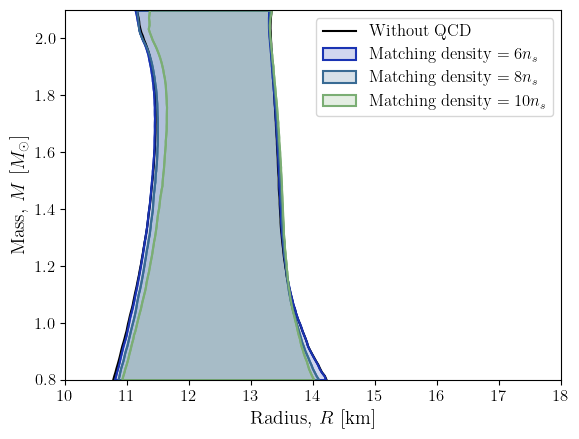

In [5]:
y = np.linspace(0.8, 2.1, 100)

fig, ax = plt.subplots()

quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles.csv')

ax.plot(quantiles.loc[5,:].values, y, color='k', label='Without QCD')
ax.plot(quantiles.loc[95,:].values, y, color='k')

ns_list = [6,8,10]

for i, ns in enumerate(ns_list):

    quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles_ns{ns:02}_Xmarg.csv')
    
    ax.fill_betweenx(
        y, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(ns_list))))[:3]+[0.2], 
        edgecolor=cm.imola(i/(len(ns_list))),
        linewidth=1.5,
        label=f'Matching density $={ns}n_s$'
        )
    
    ax.fill_betweenx(
        y, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(ns_list))))[:3]+[0.0], 
        edgecolor=cm.imola(i/(len(ns_list))),
        linewidth=1.5,
        zorder=2
        )

ax.legend(loc='upper right')

ax.set_xlim(10, 18)
ax.set_ylim(y[0], y[-1])

ax.set_xlabel('Radius, $R$ [km]')
ax.set_ylabel('Mass, $M$ [$M_\odot$]')

fig.savefig('figures/mass_vs_radius_Xmarg.pdf', bbox_inches='tight')